In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
# Load the dataset
df = pd.read_csv('Loan_default.csv')

In [7]:
print("="*60)
print("LOAN DEFAULT DATASET - EXPLORATORY DATA ANALYSIS")
print("="*60)

# 1. BASIC DATASET INFORMATION
print("\n1. BASIC DATASET INFORMATION")
print("-" * 40)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")

print(f"\nData Types:")
print(df.dtypes)

print(f"\nMemory Usage:")
print(f"Total Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

LOAN DEFAULT DATASET - EXPLORATORY DATA ANALYSIS

1. BASIC DATASET INFORMATION
----------------------------------------
Dataset Shape: (255347, 18)
Total Records: 255,347
Total Features: 18

Data Types:
LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

Memory Usage:
Total Memory: 142.40 MB


In [11]:
#2. DATA QUALITY ASSESSMENT
print("\n\n2. DATA QUALITY ASSESSMENT")
print("-" * 40)

# Missing values
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])
if missing_df['Missing Count'].sum() == 0:
    print("✓ No missing values found!")




2. DATA QUALITY ASSESSMENT
----------------------------------------
Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
✓ No missing values found!


In [13]:
# Duplicate records
duplicates = df.duplicated().sum()
print(f"\nDuplicate Records: {duplicates}")
if duplicates == 0:
    print("✓ No duplicate records found!")


Duplicate Records: 0
✓ No duplicate records found!


In [15]:
# 3. TARGET VARIABLE ANALYSIS
print("\n\n3. TARGET VARIABLE ANALYSIS")
print("-" * 40)

target_dist = df['Default'].value_counts()
target_pct = df['Default'].value_counts(normalize=True) * 100

print("Default Distribution:")
print(f"Non-Default (0): {target_dist[0]:,} ({target_pct[0]:.2f}%)")
print(f"Default (1): {target_dist[1]:,} ({target_pct[1]:.2f}%)")
print(f"Default Rate: {target_pct[1]:.2f}%")




3. TARGET VARIABLE ANALYSIS
----------------------------------------
Default Distribution:
Non-Default (0): 225,694 (88.39%)
Default (1): 29,653 (11.61%)
Default Rate: 11.61%


In [17]:
# 4. NUMERICAL FEATURES ANALYSIS
print("\n\n4. NUMERICAL FEATURES ANALYSIS")
print("-" * 40)

numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

print("Numerical Features Summary Statistics:")
print(df[numerical_cols].describe())

print("\nNumerical Features by Default Status:")
for col in numerical_cols:
    print(f"\n{col}:")
    default_stats = df.groupby('Default')[col].agg(['mean', 'median', 'std'])
    print(default_stats)



4. NUMERICAL FEATURES ANALYSIS
----------------------------------------
Numerical Features Summary Statistics:
                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443

In [19]:
# 5. CATEGORICAL FEATURES ANALYSIS
print("\n\n5. CATEGORICAL FEATURES ANALYSIS")
print("-" * 40)

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                   'HasDependents', 'LoanPurpose', 'HasCoSigner']

print("Categorical Features Value Counts:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

print("\nDefault Rates by Categorical Features:")
for col in categorical_cols:
    print(f"\n{col}:")
    default_by_cat = df.groupby(col)['Default'].agg(['count', 'mean']).round(4)
    default_by_cat.columns = ['Total_Count', 'Default_Rate']
    default_by_cat['Default_Rate_Pct'] = default_by_cat['Default_Rate'] * 100
    print(default_by_cat.sort_values('Default_Rate', ascending=False))



5. CATEGORICAL FEATURES ANALYSIS
----------------------------------------
Categorical Features Value Counts:

Education:
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType:
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage:
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents:
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose:
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

HasCoSigner:
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64

Default Rates by Categorical Features:

Education:
             Total_Count  Default_Rate  Default_Rate_P

In [21]:
# 6. CORRELATION ANALYSIS
print("\n\n6. CORRELATION ANALYSIS")
print("-" * 40)

# Correlation with target variable
target_corr = df[numerical_cols + ['Default']].corr()['Default'].sort_values(ascending=False)
print("Correlation with Default (Target Variable):")
print(target_corr[:-1])  # Exclude self-correlation

# Strong correlations among features
print("\nStrong Feature Correlations (|r| > 0.5):")
corr_matrix = df[numerical_cols].corr()
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
    print(strong_corr_df)
else:
    print("No strong correlations found between features")



6. CORRELATION ANALYSIS
----------------------------------------
Correlation with Default (Target Variable):
Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
CreditScore      -0.034166
MonthsEmployed   -0.097374
Income           -0.099119
Name: Default, dtype: float64

Strong Feature Correlations (|r| > 0.5):
No strong correlations found between features


In [23]:
# 7. OUTLIER DETECTION
print("\n\n7. OUTLIER DETECTION")
print("-" * 40)

print("Outlier Analysis using IQR method:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    print(f"{col}: {len(outliers):,} outliers ({outlier_pct:.2f}%)")



7. OUTLIER DETECTION
----------------------------------------
Outlier Analysis using IQR method:
Age: 0 outliers (0.00%)
Income: 0 outliers (0.00%)
LoanAmount: 0 outliers (0.00%)
CreditScore: 0 outliers (0.00%)
MonthsEmployed: 0 outliers (0.00%)
NumCreditLines: 0 outliers (0.00%)
InterestRate: 0 outliers (0.00%)
LoanTerm: 0 outliers (0.00%)
DTIRatio: 0 outliers (0.00%)


In [25]:
# 8. FEATURE ENGINEERING INSIGHTS
print("\n\n8. FEATURE ENGINEERING INSIGHTS")
print("-" * 40)

# Income to Loan Amount Ratio
df['Income_to_Loan_Ratio'] = df['Income'] / df['LoanAmount']
print("Income to Loan Amount Ratio by Default:")
print(df.groupby('Default')['Income_to_Loan_Ratio'].agg(['mean', 'median', 'std']))

# Credit Utilization (assuming this relates to credit lines)
df['Credit_Lines_Per_Age'] = df['NumCreditLines'] / df['Age']
print("\nCredit Lines per Age by Default:")
print(df.groupby('Default')['Credit_Lines_Per_Age'].agg(['mean', 'median', 'std']))

# Employment Stability (months employed per age)
df['Employment_Stability'] = df['MonthsEmployed'] / (df['Age'] * 12)  # As fraction of working life
print("\nEmployment Stability by Default:")
print(df.groupby('Default')['Employment_Stability'].agg(['mean', 'median', 'std']))



8. FEATURE ENGINEERING INSIGHTS
----------------------------------------
Income to Loan Amount Ratio by Default:
             mean    median       std
Default                              
0        1.365772  0.668607  2.266613
1        0.978392  0.487840  1.864586

Credit Lines per Age by Default:
             mean    median       std
Default                              
0        0.064322  0.055556  0.040748
1        0.081433  0.071429  0.047877

Employment Stability by Default:
             mean    median       std
Default                              
0        0.131448  0.114815  0.097678
1        0.132509  0.107923  0.107431


In [27]:
# 9. RISK PROFILING
print("\n\n9. RISK PROFILING")
print("-" * 40)

# High-risk segments
print("High-Risk Segments Analysis:")

# By Credit Score ranges
df['CreditScore_Range'] = pd.cut(df['CreditScore'], 
                                bins=[0, 500, 600, 700, 800, 1000],
                                labels=['Very Poor (<500)', 'Poor (500-599)', 
                                       'Fair (600-699)', 'Good (700-799)', 'Excellent (800+)'])

credit_risk = df.groupby('CreditScore_Range')['Default'].agg(['count', 'mean']).round(4)
credit_risk.columns = ['Total_Count', 'Default_Rate']
print("\nDefault Rate by Credit Score Range:")
print(credit_risk)

# By DTI Ratio ranges
df['DTI_Range'] = pd.cut(df['DTIRatio'], 
                        bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                        labels=['Low (0-20%)', 'Moderate (20-40%)', 
                               'High (40-60%)', 'Very High (60-80%)', 'Extreme (80%+)'])

dti_risk = df.groupby('DTI_Range')['Default'].agg(['count', 'mean']).round(4)
dti_risk.columns = ['Total_Count', 'Default_Rate']
print("\nDefault Rate by DTI Ratio Range:")
print(dti_risk)



9. RISK PROFILING
----------------------------------------
High-Risk Segments Analysis:

Default Rate by Credit Score Range:
                   Total_Count  Default_Rate
CreditScore_Range                           
Very Poor (<500)         93507        0.1277
Poor (500-599)           46442        0.1181
Fair (600-699)           46452        0.1117
Good (700-799)           45946        0.1040
Excellent (800+)         23000        0.0983

Default Rate by DTI Ratio Range:
                    Total_Count  Default_Rate
DTI_Range                                    
Low (0-20%)               33513        0.1036
Moderate (20-40%)         63856        0.1116
High (40-60%)             63644        0.1182
Very High (60-80%)        63979        0.1224
Extreme (80%+)            30355        0.1218


In [29]:
# 10. STATISTICAL TESTS
print("\n\n10. STATISTICAL TESTS")
print("-" * 40)

print("T-tests for Numerical Features (Default vs Non-Default):")
for col in numerical_cols:
    default_group = df[df['Default'] == 1][col]
    non_default_group = df[df['Default'] == 0][col]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(default_group, non_default_group, equal_var=False)
    
    print(f"{col}: t-statistic = {t_stat:.4f}, p-value = {p_value:.2e}")

print("\nChi-square tests for Categorical Features:")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Default'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"{col}: Chi2 = {chi2:.4f}, p-value = {p_value:.2e}")



10. STATISTICAL TESTS
----------------------------------------
T-tests for Numerical Features (Default vs Non-Default):
Age: t-statistic = -90.6753, p-value = 0.00e+00
Income: t-statistic = -48.1549, p-value = 0.00e+00
LoanAmount: t-statistic = 44.5176, p-value = 0.00e+00
CreditScore: t-statistic = -17.3024, p-value = 8.16e-67
MonthsEmployed: t-statistic = -50.1927, p-value = 0.00e+00
NumCreditLines: t-statistic = 14.3025, p-value = 2.79e-46
InterestRate: t-statistic = 69.2734, p-value = 0.00e+00
LoanTerm: t-statistic = 0.2749, p-value = 7.83e-01
DTIRatio: t-statistic = 9.7851, p-value = 1.39e-22

Chi-square tests for Categorical Features:
Education: Chi2 = 214.0190, p-value = 3.94e-46
EmploymentType: Chi2 = 529.7449, p-value = 1.71e-114
MaritalStatus: Chi2 = 200.3611, p-value = 3.11e-44
HasMortgage: Chi2 = 133.2520, p-value = 7.96e-31
HasDependents: Chi2 = 306.8506, p-value = 1.06e-68
LoanPurpose: Chi2 = 127.9342, p-value = 1.08e-26
HasCoSigner: Chi2 = 390.3050, p-value = 7.10e-87


In [31]:
# 11. KEY INSIGHTS SUMMARY
print("\n\n11. KEY INSIGHTS SUMMARY")
print("=" * 60)

print(f"• Dataset contains {df.shape[0]:,} loan records with {df.shape[1]} features")
print(f"• Overall default rate: {target_pct[1]:.2f}%")
print(f"• No missing values or duplicates detected")

# Find the most correlated features with default
top_positive_corr = target_corr[target_corr > 0].nlargest(3)
top_negative_corr = target_corr[target_corr < 0].nsmallest(3)

print(f"\nTop factors positively associated with default:")
for feature, corr in top_positive_corr.items():
    if feature != 'Default':
        print(f"  • {feature}: {corr:.4f}")

print(f"\nTop factors negatively associated with default:")
for feature, corr in top_negative_corr.items():
    print(f"  • {feature}: {corr:.4f}")

# High-risk categories
print(f"\nHighest risk segments:")
for col in categorical_cols:
    highest_risk = df.groupby(col)['Default'].mean().idxmax()
    risk_rate = df.groupby(col)['Default'].mean().max() * 100
    print(f"  • {col}: {highest_risk} ({risk_rate:.1f}% default rate)")

print("\n" + "="*60)
print("EDA COMPLETE - Ready for visualization and modeling!")
print("="*60)




11. KEY INSIGHTS SUMMARY
• Dataset contains 255,347 loan records with 23 features
• Overall default rate: 11.61%
• No missing values or duplicates detected

Top factors positively associated with default:
  • InterestRate: 0.1313
  • LoanAmount: 0.0867

Top factors negatively associated with default:
  • Age: -0.1678
  • Income: -0.0991
  • MonthsEmployed: -0.0974

Highest risk segments:
  • Education: High School (12.9% default rate)
  • EmploymentType: Unemployed (13.6% default rate)
  • MaritalStatus: Divorced (12.5% default rate)
  • HasMortgage: No (12.3% default rate)
  • HasDependents: No (12.7% default rate)
  • LoanPurpose: Business (12.3% default rate)
  • HasCoSigner: No (12.9% default rate)

EDA COMPLETE - Ready for visualization and modeling!


In [33]:
def create_visualizations():
    """
    Create comprehensive visualizations for the loan default dataset
    """
    
    # Set up the plotting parameters
    plt.rcParams['figure.figsize'] = (12, 8)
    
    # 1. Target Variable Distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot
    target_counts = df['Default'].value_counts()
    ax1.bar(['Non-Default', 'Default'], target_counts.values, color=['skyblue', 'salmon'])
    ax1.set_title('Distribution of Default Status')
    ax1.set_ylabel('Count')
    for i, v in enumerate(target_counts.values):
        ax1.text(i, v + 1000, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', fontweight='bold')
    
    # Pie chart
    ax2.pie(target_counts.values, labels=['Non-Default', 'Default'], autopct='%1.1f%%', 
            colors=['skyblue', 'salmon'], startangle=90)
    ax2.set_title('Default Rate Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Numerical Features Distribution
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.ravel()
    
    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[df['Default']==0][col], bins=50, alpha=0.7, label='Non-Default', color='skyblue')
        axes[i].hist(df[df['Default']==1][col], bins=50, alpha=0.7, label='Default', color='salmon')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()
    
    # 3. Box plots for numerical features
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.ravel()
    
    for i, col in enumerate(numerical_cols):
        df.boxplot(column=col, by='Default', ax=axes[i])
        axes[i].set_title(f'{col} by Default Status')
        axes[i].set_xlabel('Default Status')
    
    plt.suptitle('')  # Remove automatic title
    plt.tight_layout()
    plt.show()
    
    # 4. Correlation Heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols + ['Default']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # 5. Categorical Features vs Default Rate
    fig, axes = plt.subplots(2, 4, figsize=(20, 12))
    axes = axes.ravel()
    
    for i, col in enumerate(categorical_cols):
        default_rates = df.groupby(col)['Default'].mean().sort_values(ascending=False)
        default_rates.plot(kind='bar', ax=axes[i], color='coral')
        axes[i].set_title(f'Default Rate by {col}')
        axes[i].set_ylabel('Default Rate')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Remove empty subplot
    axes[7].remove()
    
    plt.tight_layout()
    plt.show()
    
    # 6. Feature Importance Visualization (Correlation with Target)
    plt.figure(figsize=(10, 8))
    target_corr_plot = target_corr[target_corr.index != 'Default'].sort_values()
    colors = ['red' if x < 0 else 'green' for x in target_corr_plot.values]
    target_corr_plot.plot(kind='barh', color=colors)
    plt.title('Feature Correlation with Default Status')
    plt.xlabel('Correlation Coefficient')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

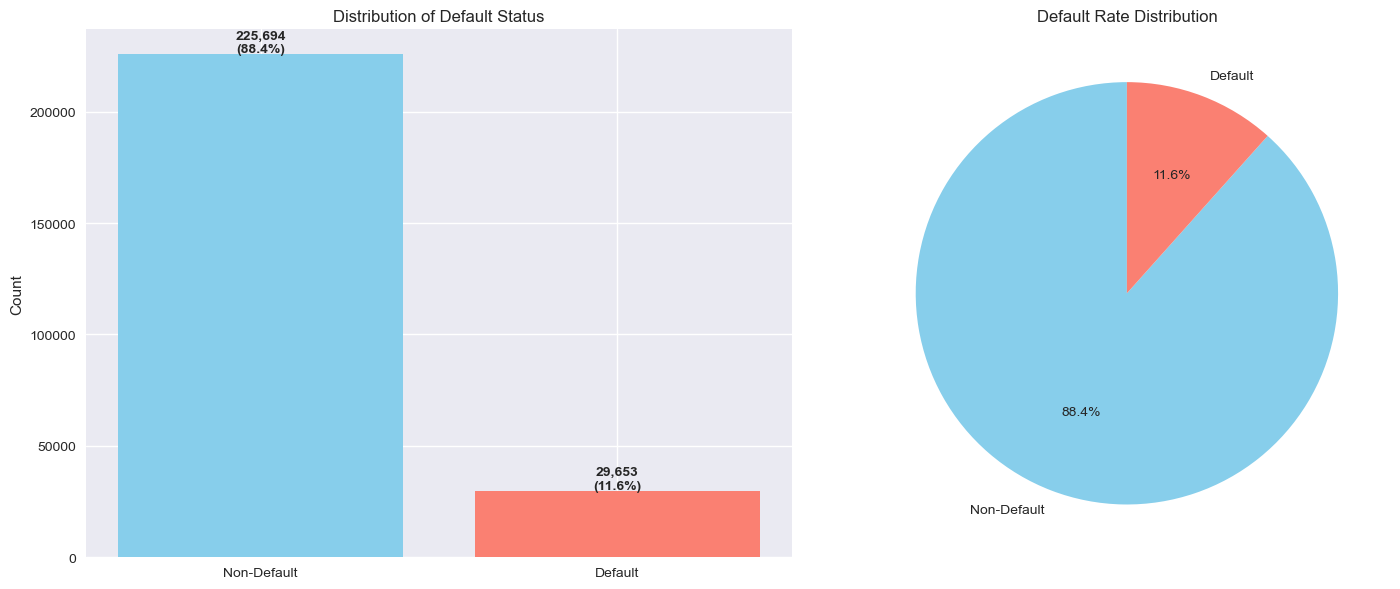

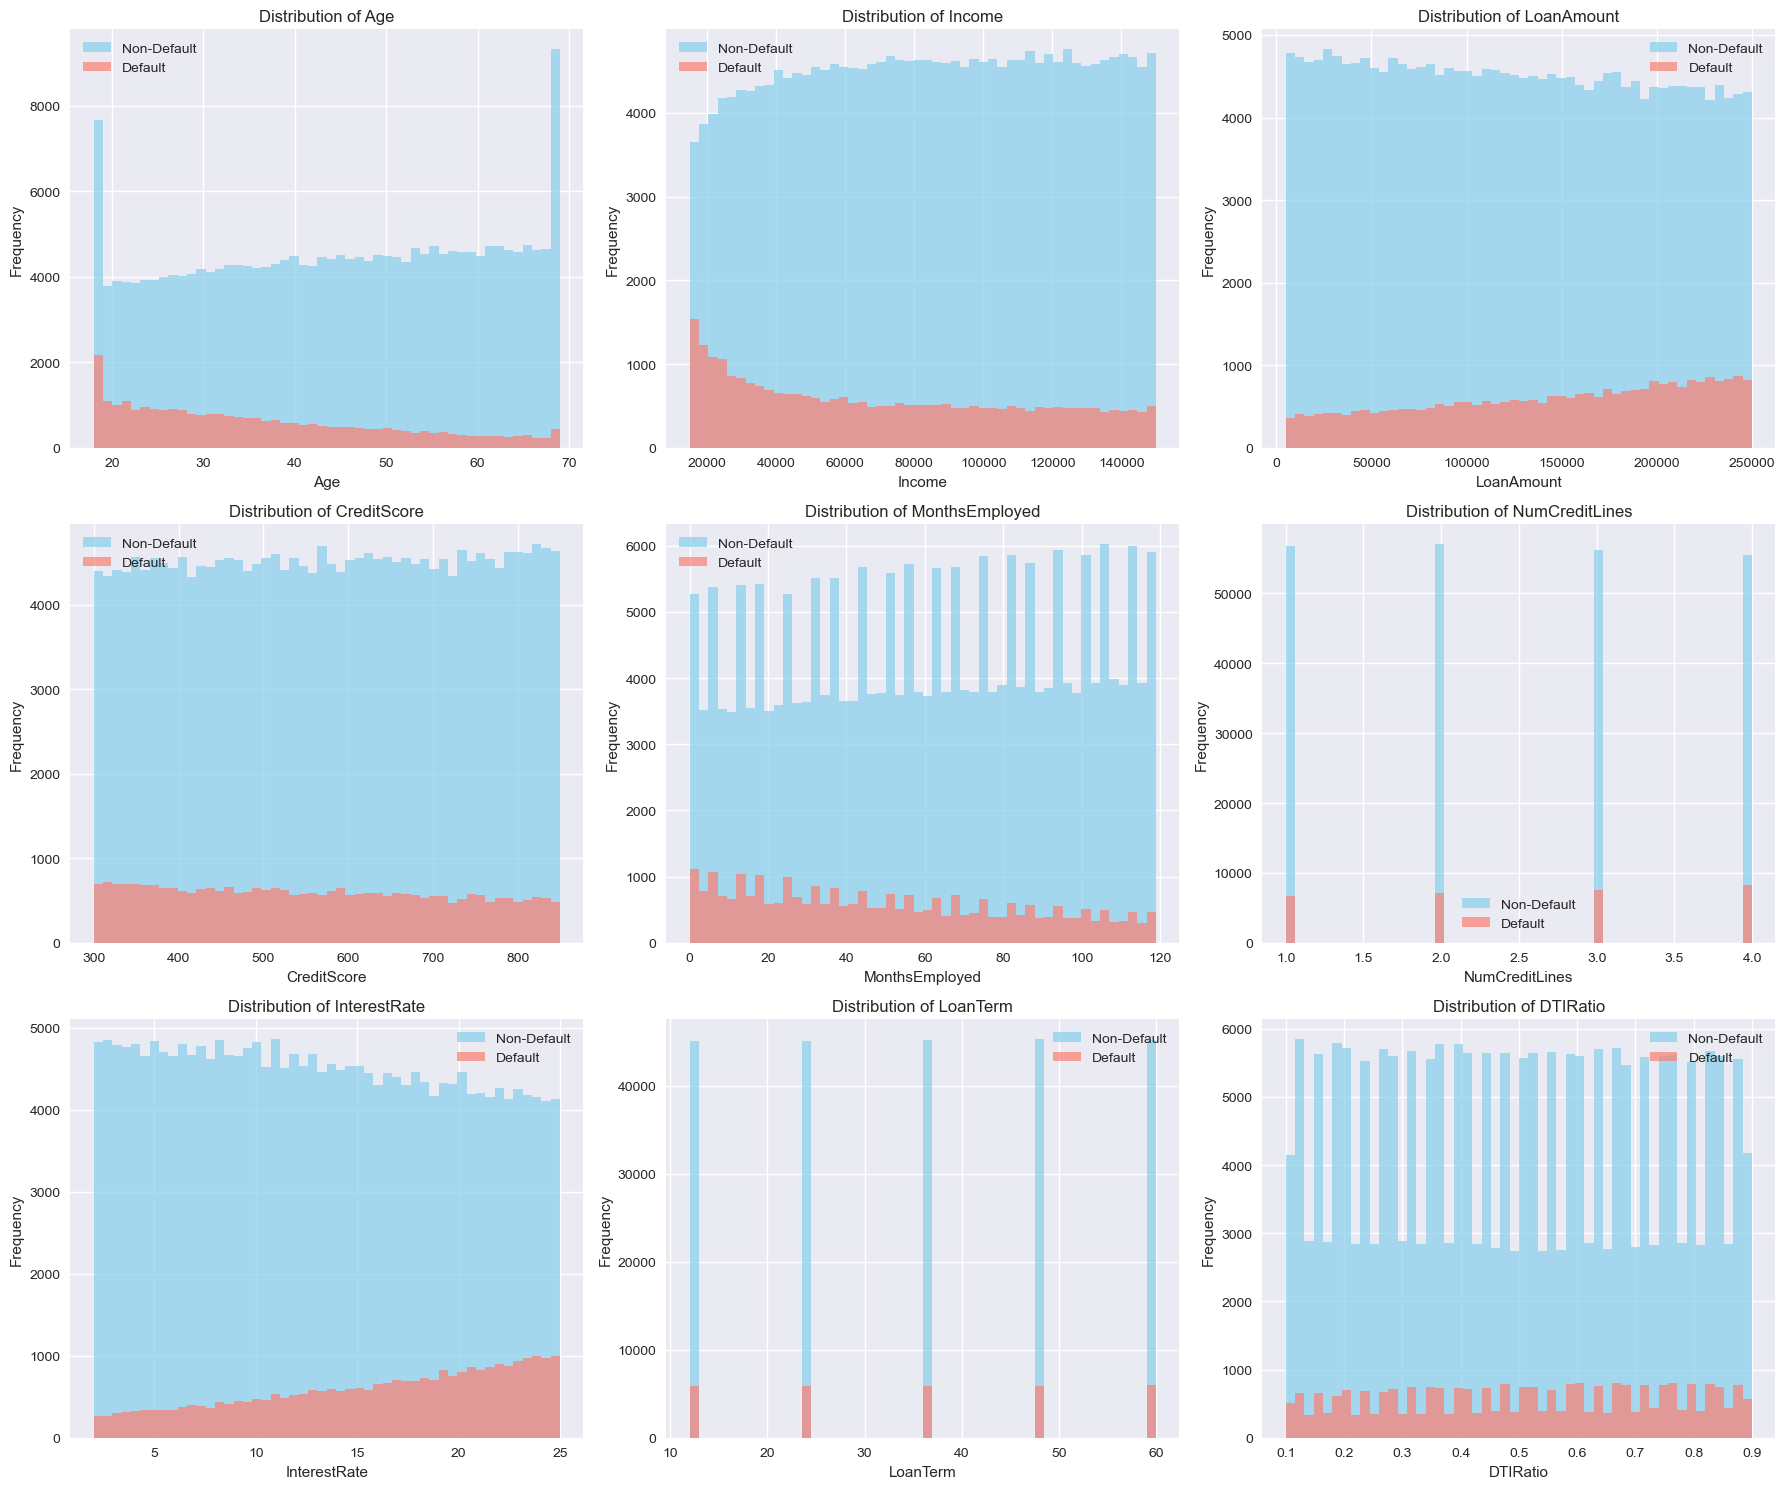

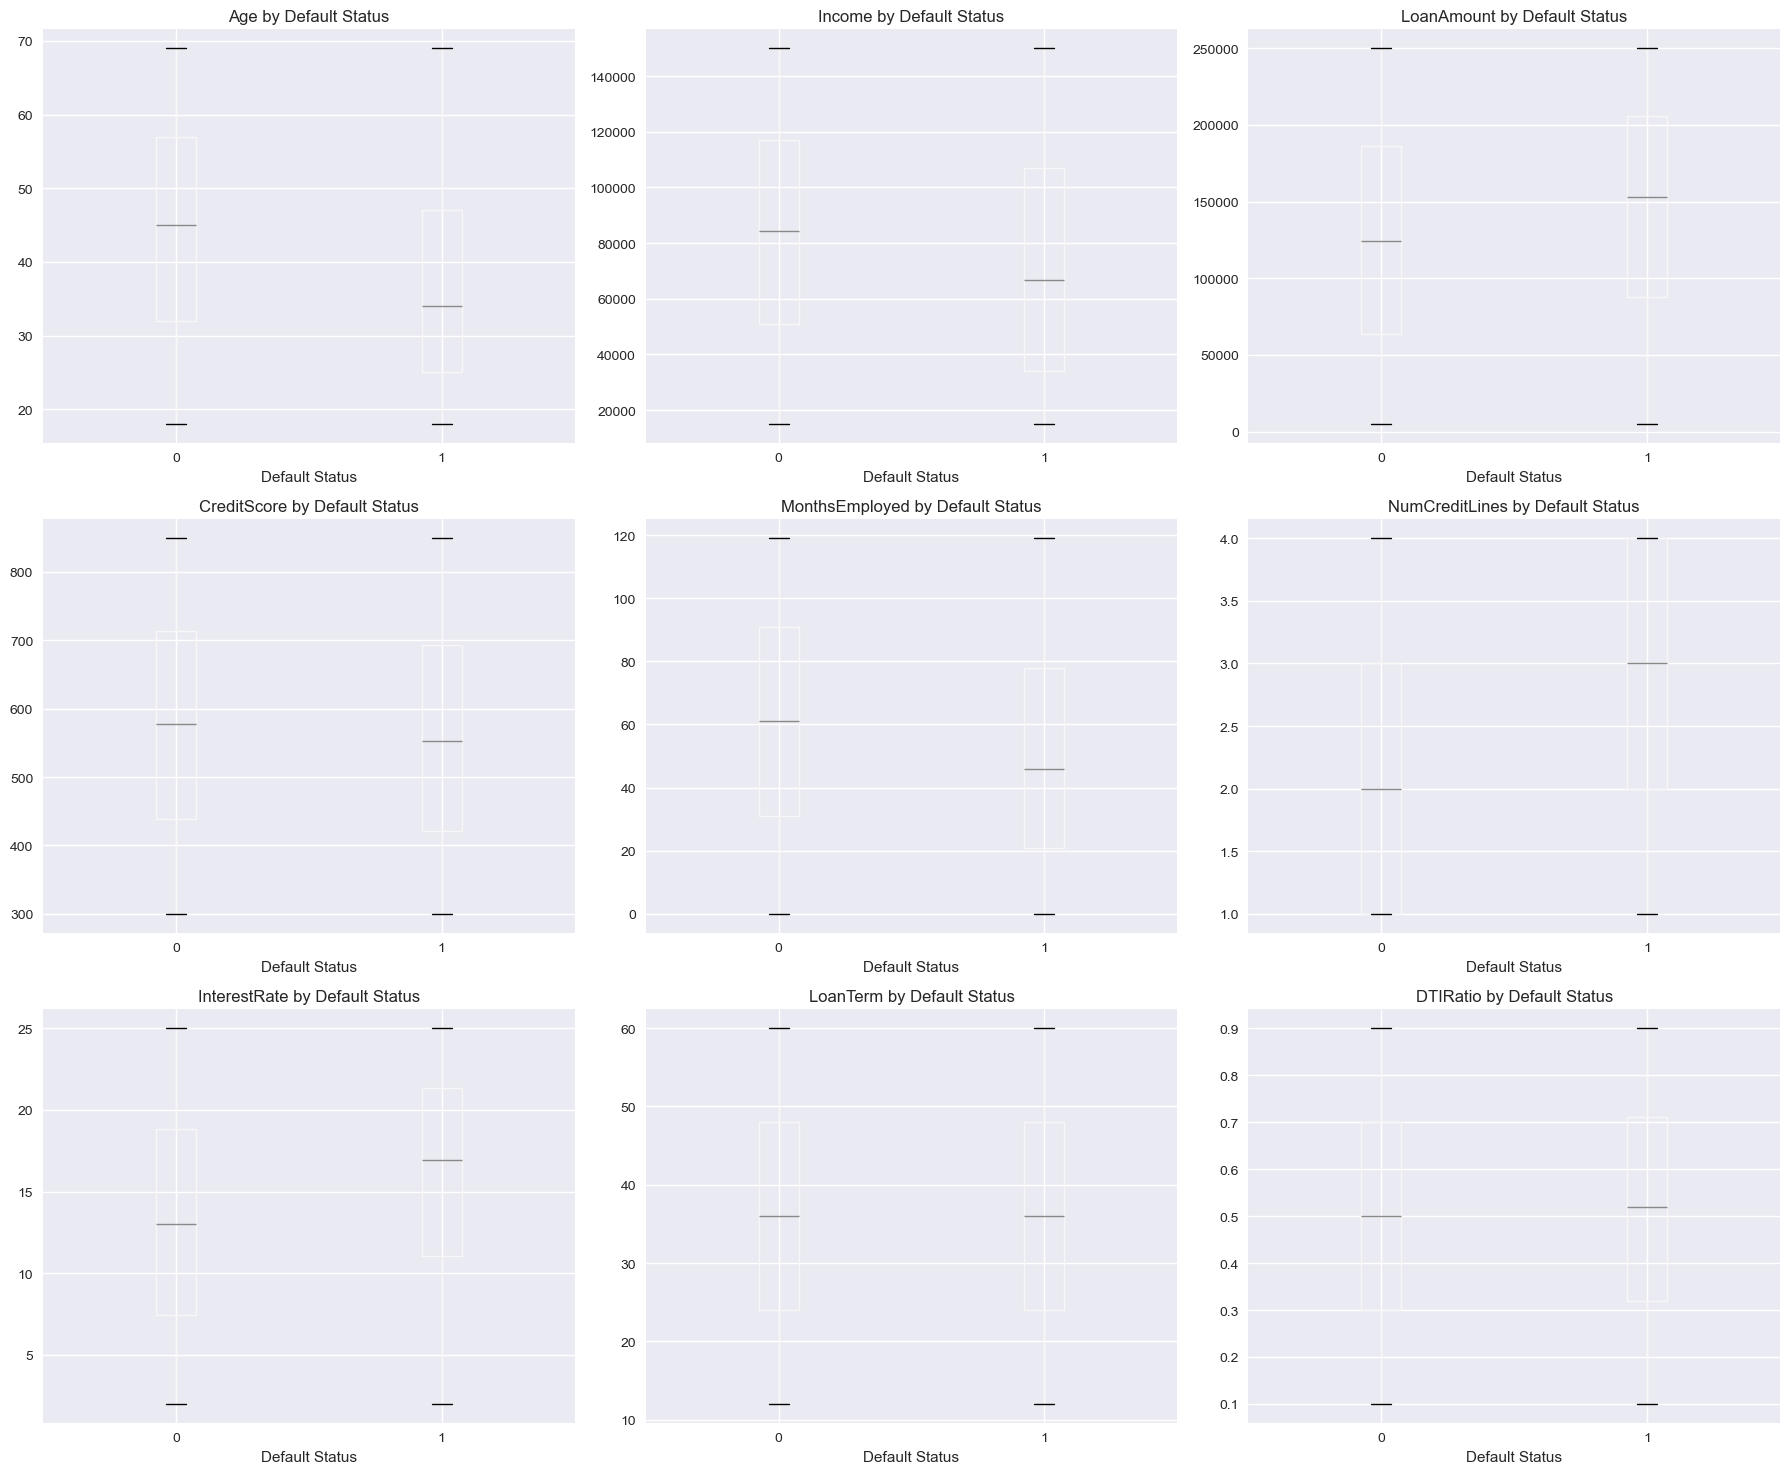

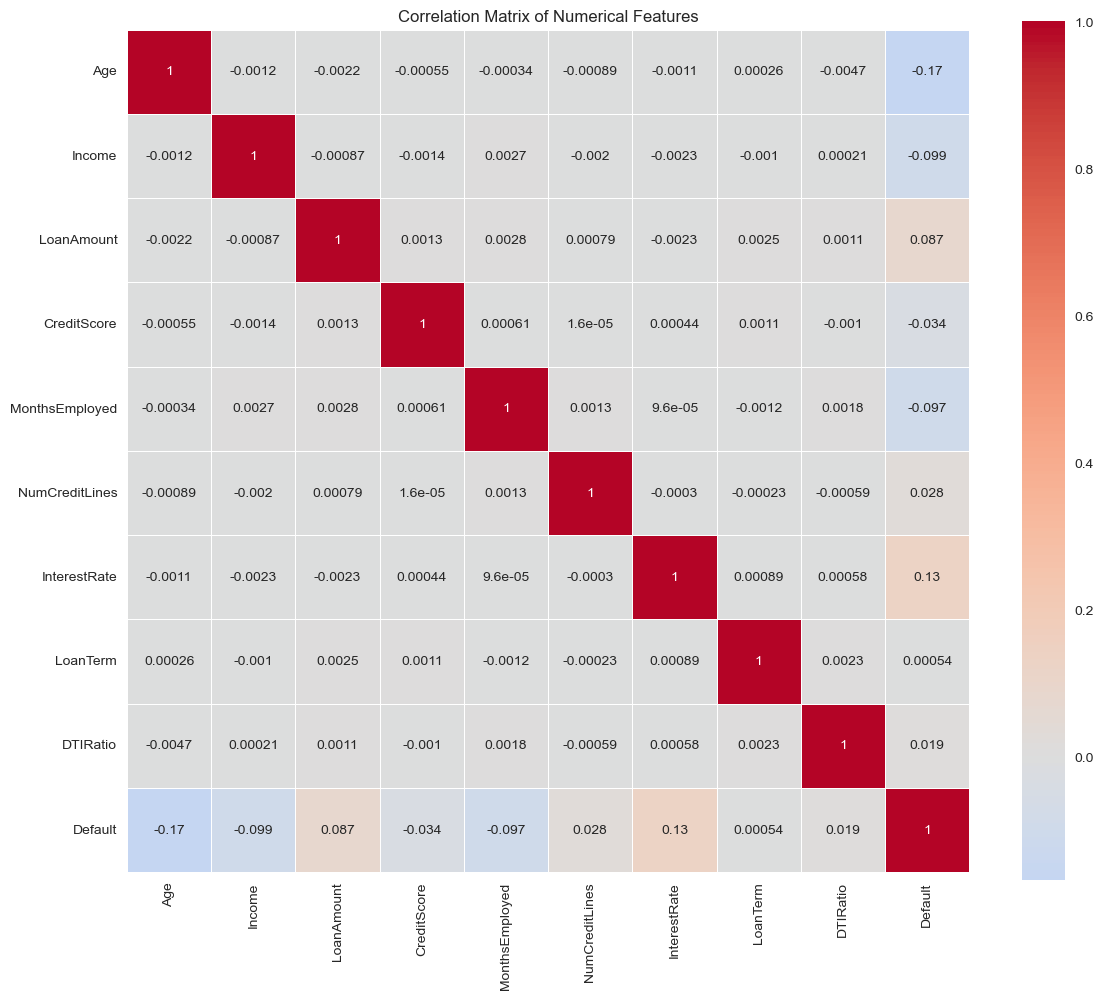

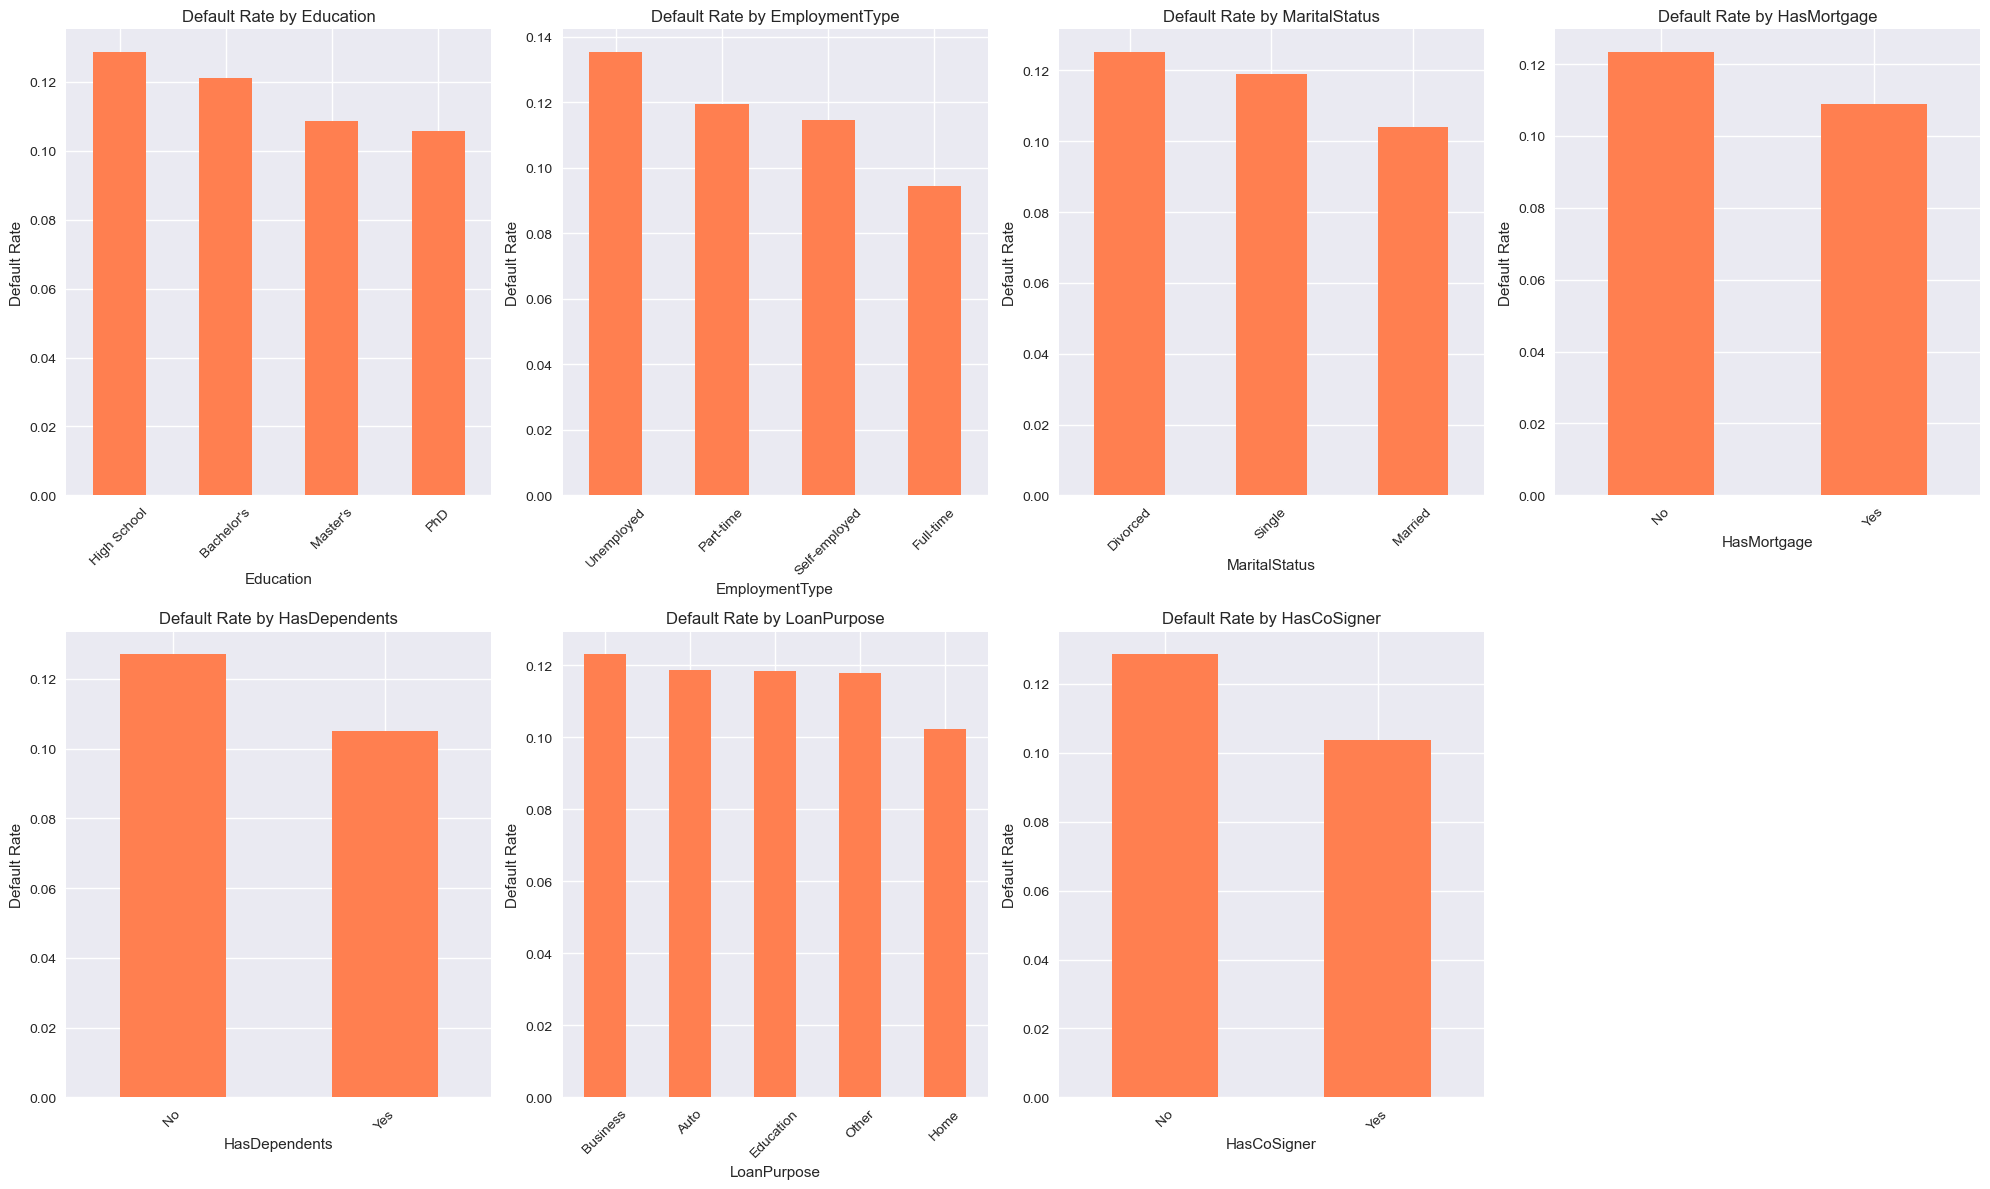

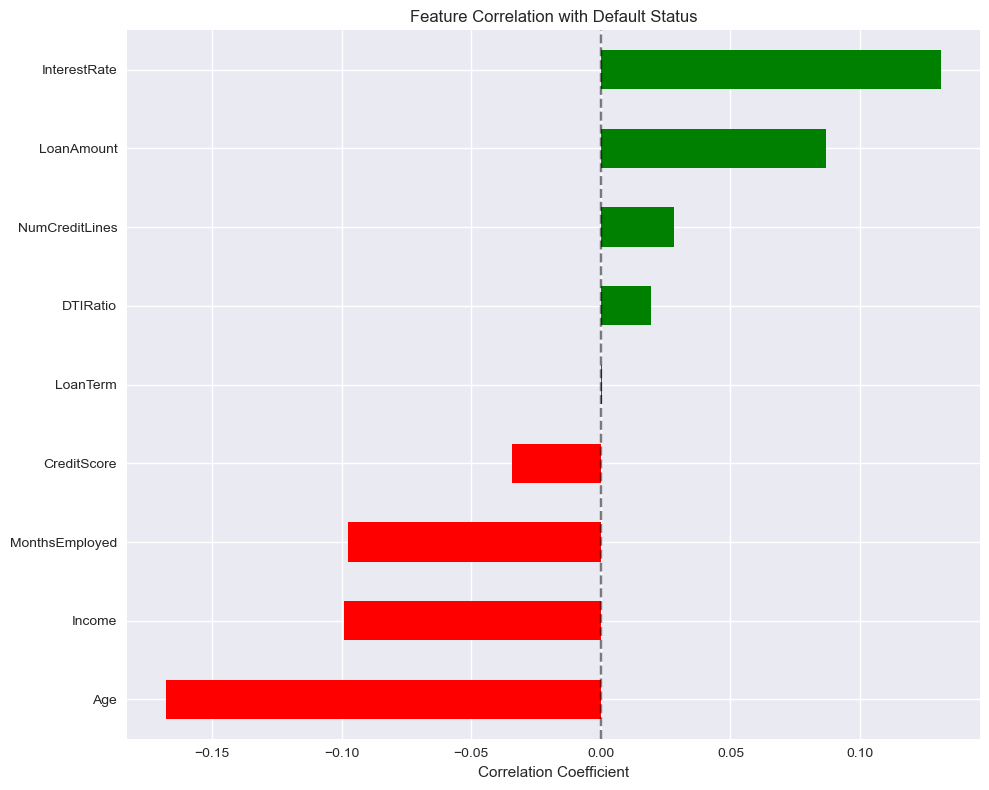

In [35]:
create_visualizations()